In [ ]:
!pip install matplotlib mpmath numpy pandas sympy bokeh
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


I would like a scatter plot of only the data from the last 20 years of the Copa America and Eurocup tournaments, that show the away vs home score of the fifa_results.csv

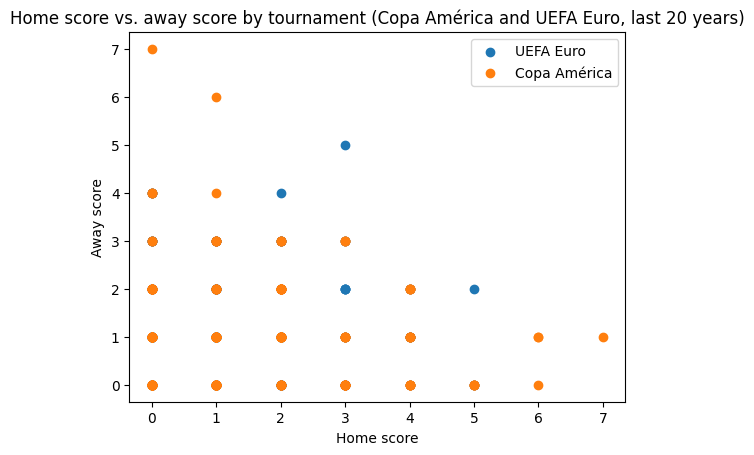

In [ ]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Load the data from the CSV file into a Pandas DataFrame
data_file = '/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/fifa_results.csv'
df = pd.read_csv(data_file)
# parsing dates
df['date'] = pd.to_datetime(df['date'],errors='coerce',format='%Y-%m-%d')
df['Year'] = df['date'].dt.year
# Filter the DataFrame to include only data from the last 20 years and the Copa America and Eurocup tournaments
last_year = df['Year'].max()
df_copa_euro = df[(df['Year'] >= last_year - 19) & (df['tournament'].isin(['Copa América', 'UEFA Euro']))]

# Create a scatter plot of home score vs. away score colored by tournament
fig, ax = plt.subplots()
for tournament in df_copa_euro['tournament'].unique():
    data = df_copa_euro[df_copa_euro['tournament'] == tournament]
    ax.scatter(data['home_score'], data['away_score'], label=tournament)

# Set the title and axis labels
ax.set_title('Home score vs. away score by tournament (Copa América and UEFA Euro, last 20 years)')
ax.set_xlabel('Home score')
ax.set_ylabel('Away score')

# Add a legend
ax.legend()

plt.show()